# Regularization Paths of L1 and L2 Regularized Cost Functions
In this notebook, the changes in linear regression coefficient values according to $\delta^{2}$ values is visualized for L2 and L1 regularizers.

This notebook is based on an assignment in the UBC CPSC 340 Machine Learning Course - Nando de Freitas. This course contains great explanations of various machine learning subjects and is highly recommended.

[Course playlist on youtube](https://youtube.com/playlist?list=PLE6Wd9FR--Ecf_5nCbnSQMHqORpiChfJf)

[Check my Github repository for similar introductory notebooks](https://github.com/YZouzou/ML-Topics-Intro)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import sklearn as sk
plt.style.use('bmh')

This dataset is from a prostate cancer study. In this prostate cancer study 9 variables – including age, log weight, log cancer volume, etc. – were measured for 97 patients. This dataset is used to construct a linear regression model to predict the 9th variable using the other 8 variables. The model will be constructed using an L1 and L2 regularizer.

Link to dataset by selva86: https://github.com/selva86/datasets/blob/master/prostate.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/prostate.csv')
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [3]:
y = np.asarray(df.iloc[:, -1])
X = np.asarray(df.iloc[:, :-1])

Splitting the dataset to train and test sets.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 47, random_state = 10)

## Ridge (L2 Regularized) Regression
**Ridge cost function**:
$$ J = (y - X\Theta)^{T}(y - X\Theta) + \delta^{2}\Theta^{T} \Theta$$

### `ridge_regr`
This function calculates the theta vector assuming a value for delta (Ridge regression).

In [22]:
def ridge_regr(x, y, delta):
    x_norm = x - x.mean(axis = 0)
    y_norm = y - y.mean(axis = 0)
    
    Theta = np.linalg.inv(x_norm.T @ x_norm + delta * np.eye(x.shape[1])) @ x_norm.T @ y_norm
    b = y.mean(axis = 0) - x.mean(axis = 0) @ Theta
    
    return np.append(b, Theta.flatten())

## Training data:

Choose $\delta^{2}$ value

In [8]:
delta = 10

### My function:

In [9]:
# Without normalization
theta = ridge_regr(x_train, y_train, delta)
# A column with ones was added to x_train to be multiplied by the bias
x1 = np.append(x_train, np.ones((x_train.shape[0], 1)), axis = 1)
y_train_hat = x1 @ theta.reshape(-1, 1)

# Prediction score
print('Without normalization:',sk.metrics.r2_score(y_train, y_train_hat.flatten()))

# Input Normalized (mean = 0, std = 1)
x_train_norm = (x_train - x_train.mean(axis = 0)) / x_train.std(axis = 0)
theta = ridge_regr(x_train_norm, y_train, delta)
x1 = np.append(x_train_norm, np.ones((x_train.shape[0], 1)), axis = 1)
y_train_hat = x1 @ theta.reshape(-1, 1)

# Prediction score
print('Input normalized:',sk.metrics.r2_score(y_train, y_train_hat.flatten()))

# Input Normalized (mean = 0, std = 1), Output mean = 0
y_train_norm = y_train - y_train.mean()
theta = ridge_regr(x_train_norm, y_train_norm, delta)
y_train_hat = x1 @ theta.reshape(-1, 1)
print('Input and output normalized:',sk.metrics.r2_score(y_train_norm, y_train_hat.flatten()))

Without normalization: 0.7022601629274527
Input normalized: 0.7235320941117327
Input and output normalized: 0.7235320941117327


### Scikit Learn:

In [10]:
ridge = Ridge(alpha = delta)
ridge.fit(x_train, y_train)
print('Without normalization:', ridge.score(x_train, y_train))

ridge.fit(x_train_norm, y_train)
print('Input normalized:', ridge.score(x_train_norm, y_train))

ridge.fit(x_train_norm, y_train_norm)
print('Input and output normalized:', ridge.score(x_train_norm, y_train_norm))

Without normalization: 0.7022601629274527
Input normalized: 0.7235320941117329
Input and output normalized: 0.7235320941117328


## Test data:

### My function:

In [11]:
# Without normalization
theta = ridge_regr(x_train, y_train, delta)
# A column with ones was added to x_train to be multiplied by the bias
x1 = np.append(x_test, np.ones((x_test.shape[0], 1)), axis = 1)
y_test_hat = x1 @ theta.reshape(-1, 1)

# Prediction score
print('Without normalization:',sk.metrics.r2_score(y_test, y_test_hat.flatten()))

# Input Normalized (mean = 0, std = 1)
x_train_norm = (x_train - x_train.mean(axis = 0)) / x_train.std(axis = 0)
theta = ridge_regr(x_train_norm, y_train, delta)
x_test_norm = (x_test - x_train.mean(axis = 0)) / x_train.std(axis = 0)
x1 = np.append(x_test_norm, np.ones((x_test.shape[0], 1)), axis = 1)
y_test_hat = x1 @ theta.reshape(-1, 1)

# Prediction score
print('Input normalized:',sk.metrics.r2_score(y_test, y_test_hat.flatten()))

# Input Normalized (mean = 0, std = 1), Output mean = 0
y_train_norm = y_train - y_train.mean()
theta = ridge_regr(x_train_norm, y_train_norm, delta)
y_test_norm = y_test - y_train.mean()
y_test_hat = x1 @ theta.reshape(-1, 1)

# Prediction score
print('Input and output normalized:',sk.metrics.r2_score(y_test_norm, y_test_hat.flatten()))

Without normalization: 0.4951728375303488
Input normalized: 0.5305090631845154
Input and output normalized: 0.5305090631845155


### Scikit Learn:

In [12]:
ridge = Ridge(alpha = delta)
ridge.fit(x_train, y_train)
print('Without normalization:', ridge.score(x_test, y_test))

ridge.fit(x_train_norm, y_train)
print('Input normalized:', ridge.score(x_test_norm, y_test))

ridge.fit(x_train_norm, y_train_norm)
print('Input and output normalized:', ridge.score(x_test_norm, y_test_norm))

Without normalization: 0.4951728375303489
Input normalized: 0.5305090631845156
Input and output normalized: 0.5305090631845155


### Notes:
* According to the previous experiments, normalizing inputs improved the score marginally
* Normalizing the output had no effect at all

### Regularization path for Ridge (L2)
Here the changes in coefficient values ($\Theta$) according to $\delta^{2}$ values is plotted. As $\delta^{2}$ increases, the penalty on $\Theta$ increases and $\Theta$ values approach zero.

In [13]:
x_train_norm = (x_train - x_train.mean(axis = 0)) / x_train.std(axis = 0)
x_test_norm = (x_test - x_train.mean(axis = 0)) / x_train.std(axis = 0)

min_delta = -5
max_delta = 15

# Every row in theta_arr contains the coefficients corresponding to a certain alpha value
theta_arr = np.zeros((max_delta - min_delta, x_train.shape[1] + 1))

# alpha_arr contains the alpha values used
delta_arr = np.array([2**x for x in range(min_delta, max_delta)])

for i, delta in enumerate(delta_arr):
    theta = ridge_regr(x_train_norm, y_train, delta)
    theta_arr[i] = theta


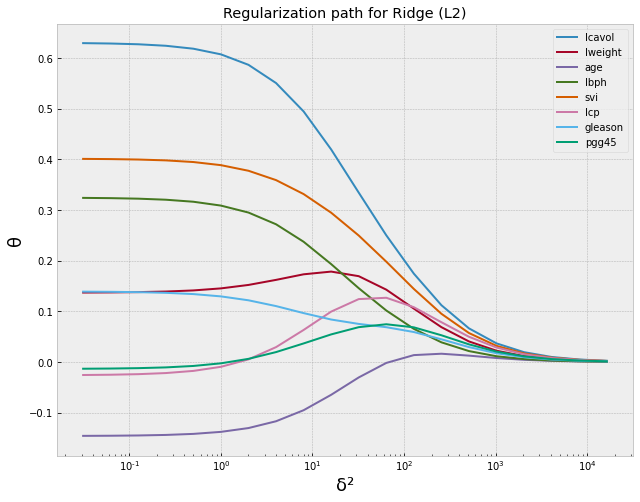

In [14]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])
for i, label in enumerate(df.columns[:-1]):
    ax.plot(delta_arr, theta_arr[:, i], label = label)
ax.set_xscale('log')
ax.set_xlabel('\u03B4\u00B2', fontsize = 18)
ax.set_ylabel('\u03B8', fontsize = 18)
ax.set_title('Regularization path for Ridge (L2)')
plt.legend()
plt.show()

### Test and train error
Here test and train error is plotted against $\delta^{2}$ values. Train error is lowest for smallest $\delta^{2}$ values, however test error is not minimum in this case (overfit). By increasing $\delta^{2}$ value, test error decreases because the model is more generalized in this case. An optimum value for $\delta^{2}$ can be determined using cross validation.

In [15]:
# A column with ones was added to x_train/x_test to be multiplied by the bias
x1 = np.append(x_test_norm, np.ones((x_test.shape[0], 1)), axis = 1)
x2 = np.append(x_train_norm, np.ones((x_train.shape[0], 1)), axis = 1)

test_error_arr = np.zeros(max_delta - min_delta)
train_error_arr = np.zeros(max_delta - min_delta)

for i, delta in enumerate(delta_arr):
    
    theta = ridge_regr(x_train_norm, y_train, delta)
    
    y_hat = x1 @ theta
    error = np.linalg.norm(y_test - y_hat) / np.linalg.norm(y_test)
    test_error_arr[i] = error
    
    y_hat = x2 @ theta
    error = np.linalg.norm(y_train - y_hat) / np.linalg.norm(y_train)
    train_error_arr[i] = error

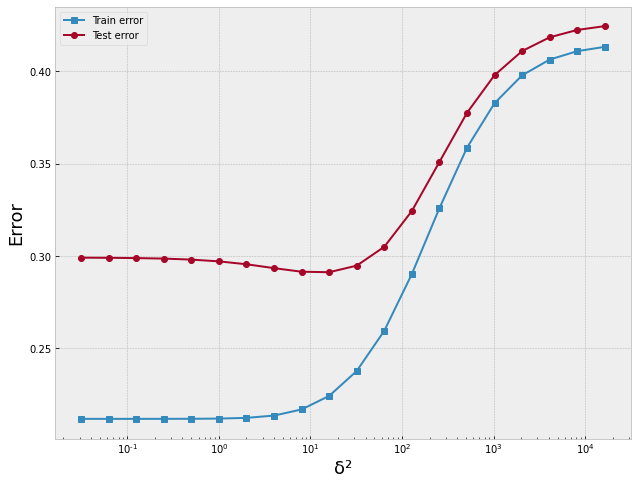

In [16]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(delta_arr, train_error_arr, label = 'Train error', marker = 's')
ax.plot(delta_arr, test_error_arr, label = 'Test error', marker = 'o')
ax.set_xscale('log')
ax.set_xlabel('\u03B4\u00B2', fontsize = 18)
ax.set_ylabel('Error', fontsize = 18)

ax.set_xscale('log')
plt.legend()
plt.show()

## Lasso (L1 Regularized) Linear Regression
**Lasso regularized least squares cost function:**
$$ J = (y - X\Theta)^{T}(y - X\Theta) + \delta^{2}\sum_{j=1}^d|\theta_{j}|$$

### `lasso_regr`
This function calculates the linear regression coefficients and intercept using a least squares loss function regularized by L1 (Lasso) regularizer.

In [17]:
def lasso_regr(x, y, theta_init, alpha, tolerance, print_iter = False):
    x_norm = x - x.mean(axis = 0)
    y_norm = y - y.mean(axis = 0)

    a = (1 / x.shape[0]) * np.sum(x_norm**2, axis = 0)

    i = 0
    theta = theta_init.copy()
    while True:
        theta_prev = theta.copy()
        for j in range(x.shape[1]):
            x_notj = np.delete(x_norm, j, 1)
            theta_notj = np.delete(theta, j, 0)

            cj = (1 / x.shape[0]) * np.sum((y_norm - x_notj @ theta_notj) * x_norm[:, j], axis = 0)

            if cj < -alpha:
                theta_j = (cj + alpha) / a[j]
            elif cj > alpha:
                theta_j = (cj - alpha) / a[j]
            else:
                theta_j = 0.
                
            theta[j] = theta_j
        i += 1
        if i > 1000:
            print('Number of iterations exceeded 1000')
            return False
        
        if all(np.abs(theta - theta_prev) < tolerance):
            if print_iter:
                print('Number of iterations: ', i)
            b = y.mean(axis = 0) - x.mean(axis = 0) @ theta
            return np.append(theta.flatten(), b)

### Regularization path for Lasso (L1)

Here the change in linear regression coefficient ($\Theta$) values is plotted against $\delta^{2}$ values. Lasso regularization allows for automatic feature selection. As we can observe in the graph, $\theta$ values that reach zero stay zero for larger $\delta^{2}$. This means that the corresponding features are no longer necessary for the model.

In [18]:
x_train_norm = (x_train - x_train.mean(axis = 0)) / x_train.std(axis = 0)
x_test_norm = (x_test - x_train.mean(axis = 0)) / x_train.std(axis = 0)

tolerance = 1e-5

min_delta = -10
max_delta = 2

theta_arr = np.zeros((max_delta - min_delta, 9))
delta_arr = np.array([2**x for x in range(min_delta, max_delta)])

theta_init = np.random.rand(x_train.shape[1])

for i, delta in enumerate(delta_arr):
    theta = lasso_regr(x_train_norm, y_train, theta_init, delta, tolerance, print_iter = False)
    theta_arr[i] = theta


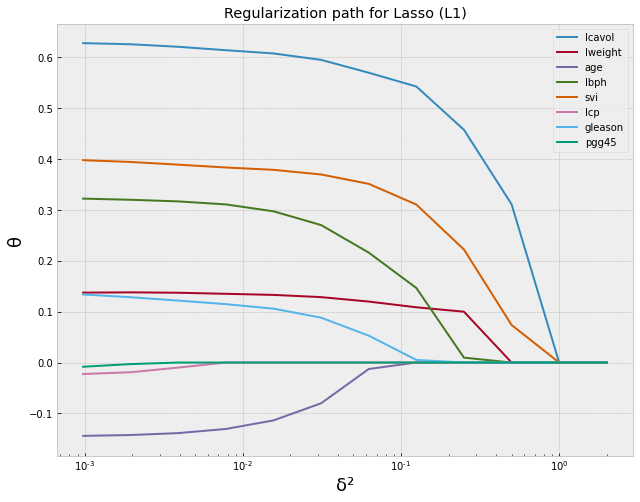

In [19]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])
for i, label in enumerate(df.columns[:-1]):
    ax.plot(delta_arr, theta_arr[:, i], label = label)
ax.set_xscale('log')
ax.set_xlabel('\u03B4\u00B2', fontsize = 18)
ax.set_ylabel('\u03B8', fontsize = 18)
ax.set_title('Regularization path for Lasso (L1)')
plt.legend()
plt.show()

### Test and train error
Here test and train error is plotted against $\delta^{2}$ values, similar to the previous Ridge regression case.

In [20]:
# A column with ones was added to x_train/x_test to be multiplied by the bias
x1 = np.append(x_test_norm, np.ones((x_test.shape[0], 1)), axis = 1)
x2 = np.append(x_train_norm, np.ones((x_train.shape[0], 1)), axis = 1)

test_error_arr = np.zeros(max_delta - min_delta)
train_error_arr = np.zeros(max_delta - min_delta)
alpha_arr = np.zeros(max_delta - min_delta)

for i, delta in enumerate(delta_arr):
    theta = lasso_regr(x_train_norm, y_train, theta_init, delta, tolerance, print_iter = False)
    
    y_hat = x1 @ theta
    error = np.linalg.norm(y_test - y_hat) / np.linalg.norm(y_test)
    test_error_arr[i] = error
    
    y_hat = x2 @ theta
    error = np.linalg.norm(y_train - y_hat) / np.linalg.norm(y_train)
    train_error_arr[i] = error

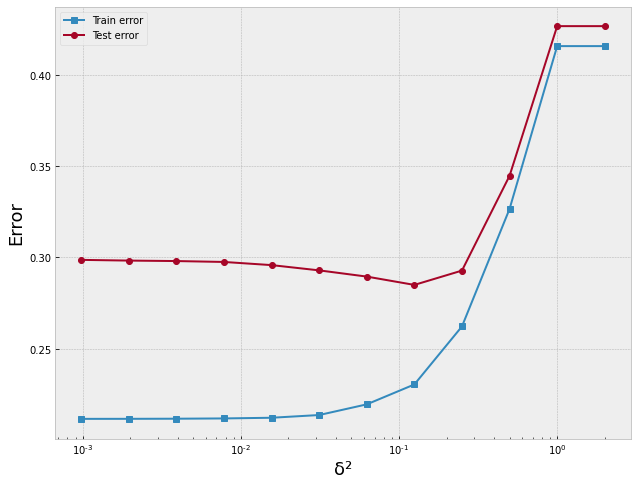

In [21]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(delta_arr, train_error_arr, label = 'Train error', marker = 's')
ax.plot(delta_arr, test_error_arr, label = 'Test error', marker = 'o')
ax.set_xscale('log')
ax.set_xlabel('\u03B4\u00B2', fontsize = 18)
ax.set_ylabel('Error', fontsize = 18)

ax.set_xscale('log')
plt.legend()
plt.show()